In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
from collections import Counter
%matplotlib inline

In [2]:
readFile = '311_Service_Requests_2015.csv'
data = pd.read_csv(readFile)

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8,17,18,40,41,42,43,44,45,46,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282098 entries, 0 to 2282097
Data columns (total 53 columns):
Unique Key                        int64
Created Date                      object
Closed Date                       object
Agency                            object
Agency Name                       object
Complaint Type                    object
Descriptor                        object
Location Type                     object
Incident Zip                      object
Incident Address                  object
Street Name                       object
Cross Street 1                    object
Cross Street 2                    object
Intersection Street 1             object
Intersection Street 2             object
Address Type                      object
City                              object
Landmark                          object
Facility Type                     object
Status                            object
Due Date                          object
Resolution Description     

In [4]:
data['Created Date'] = pd.to_datetime(data['Created Date'])
data['Closed Date'] = pd.to_datetime(data['Closed Date'])

In [6]:
data.Borough.value_counts()

BROOKLYN         682851
QUEENS           514376
MANHATTAN        472787
BRONX            409825
STATEN ISLAND    106612
Unspecified       95647
Name: Borough, dtype: int64

In [12]:
data['Created Date'].apply(lambda x: pd.Timestamp(x).year).value_counts()

2015    2282098
Name: Created Date, dtype: int64

In [34]:
data['Closed Date'].apply(lambda x: pd.Timestamp(x).year).value_counts()

2015.0    2153778
2016.0      59356
2014.0        782
1900.0         71
2013.0         11
2019.0          2
2100.0          1
Name: Closed Date, dtype: int64

In [56]:
data['Created Month'] = data['Created Date'].apply(lambda x: pd.Timestamp(x).month)

In [57]:
closedYear = data['Closed Date'].apply(lambda x: pd.Timestamp(x).year)

In [58]:
closedYear = closedYear[(closedYear > 2001) & (closedYear < 2020)]

In [59]:
closedYear.value_counts()

2015.0    2153778
2016.0      59356
2014.0        782
2013.0         11
2019.0          2
Name: Closed Date, dtype: int64

In [62]:
data = data.loc[closedYear.index]

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2213929 entries, 0 to 2282097
Data columns (total 54 columns):
Unique Key                        int64
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                            object
Agency Name                       object
Complaint Type                    object
Descriptor                        object
Location Type                     object
Incident Zip                      object
Incident Address                  object
Street Name                       object
Cross Street 1                    object
Cross Street 2                    object
Intersection Street 1             object
Intersection Street 2             object
Address Type                      object
City                              object
Landmark                          object
Facility Type                     object
Status                            object
Due Date                          object
Resolution 

In [67]:
complaintPerMonth = pd.crosstab(data['Created Month'], data['Borough'], margins=True).sort_index()
complaintPerMonth

Borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Unspecified,All
Created Month,,,,,,,
1,40325,57419,38307,37292,6933,6836,187112
2,41613,59683,37702,41502,8809,7867,197176
3,37032,60000,37662,48282,11161,7630,201767
4,30426,51913,38055,41132,9095,7803,178424
5,29461,54301,38259,41745,9198,7495,180459
6,31125,57537,37850,45796,9968,8860,191136
7,32699,56446,36714,44029,9327,6820,186035
8,30753,53230,37327,42810,8460,6084,178664
9,29564,52928,38029,40443,8664,5923,175551


# getting rid of unspecified complaint type

In [72]:
match = data[['Borough', 'City']][(data['Borough'] != 'Unspecified') & (data['City'].isnull() == False)]
match.head()

,Borough,City
0,QUEENS,Sunnyside
1,QUEENS,Bayside
3,BROOKLYN,BROOKLYN
5,BROOKLYN,BROOKLYN
7,QUEENS,Elmhurst


In [74]:
match['Borough'].value_counts()

BROOKLYN         645360
QUEENS           480999
MANHATTAN        444063
BRONX            387640
STATEN ISLAND    102225
Name: Borough, dtype: int64

In [77]:
match2 = match.groupby('City').agg(lambda x: Counter(x['Borough']).most_common(1)[0][0])
match2

,Borough
City,
00,BRONX
ARVERNE,QUEENS
ASTORIA,QUEENS
AVERNE,QUEENS
Arverne,QUEENS
Astoria,QUEENS
BAYSIDE,QUEENS
BELLEROSE,QUEENS
BELLMORE,QUEENS


In [78]:
mapToBorough = match2.to_dict()

In [79]:
newBorough = data['City'].map(mapToBorough['Borough'])

In [81]:
newBorough.value_counts()

BROOKLYN         645321
QUEENS           481070
MANHATTAN        444180
BRONX            387644
STATEN ISLAND    102229
Name: City, dtype: int64

In [86]:
data['Borough'].value_counts()

BROOKLYN         663210
QUEENS           498727
MANHATTAN        463202
BRONX            403061
STATEN ISLAND    103517
Unspecified       82212
Name: Borough, dtype: int64

In [87]:
newComplaintPerMonth = pd.crosstab(data['Created Month'], data['Borough'], margins=True).sort_index()
newComplaintPerMonth

Borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Unspecified,All
Created Month,,,,,,,
1,40325,57419,38307,37292,6933,6836,187112
2,41613,59683,37702,41502,8809,7867,197176
3,37032,60000,37662,48282,11161,7630,201767
4,30426,51913,38055,41132,9095,7803,178424
5,29461,54301,38259,41745,9198,7495,180459
6,31125,57537,37850,45796,9968,8860,191136
7,32699,56446,36714,44029,9327,6820,186035
8,30753,53230,37327,42810,8460,6084,178664
9,29564,52928,38029,40443,8664,5923,175551


In [88]:
newComplaintPerMonthPlot = pd.crosstab(data['Created Month'], data['Borough'], margins=False).sort_index()

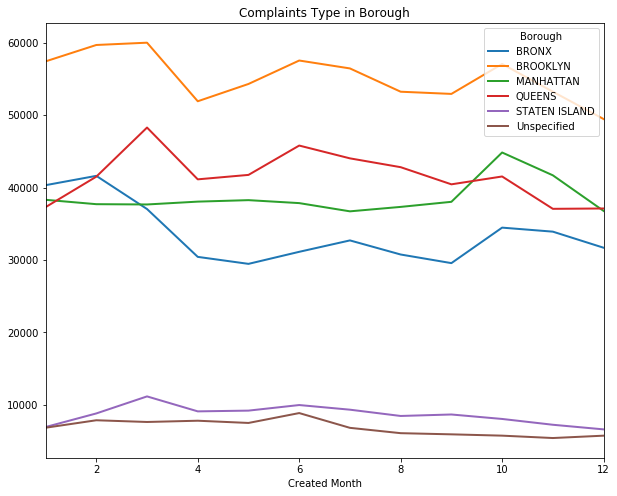

In [91]:
newComplaintPerMonthPlot.plot(title='Complaints Type in Borough', lw=2, figsize=(10,8))

# Day to close

In [96]:
data['DaysToClose'] = data['Closed Date'].apply(lambda x: pd.Timestamp(x).dayofyear) - data['Created Date'].apply(lambda x: pd.Timestamp(x).dayofyear)

In [110]:
dayToClose = data.DaysToClose[data.DaysToClose >= 0].groupby(data['Borough']).mean()
dayToClose

Borough
BRONX            8.093654
BROOKLYN         9.236238
MANHATTAN        9.785186
QUEENS           9.041730
STATEN ISLAND    7.268765
Unspecified      2.416830
Name: DaysToClose, dtype: float64

In [115]:
dayToCloseTable = pd.crosstab(columns=data['Borough'], index=data['Created Month'], values=data.DaysToClose[data.DaysToClose >= 0], aggfunc=np.mean, margins=True)
dayToCloseTable

Borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Unspecified,All
Created Month,,,,,,,
1,11.266812,13.491502,15.463635,13.091249,7.955003,2.620231,12.738508
2,10.192199,11.284760,13.622949,11.183869,5.457449,1.642435,10.844043
3,9.417112,11.643237,11.574296,11.325291,7.465778,2.174670,10.557665
4,8.681678,11.471795,10.711125,11.165273,8.879265,2.562974,10.237099
5,8.522834,10.349470,9.751347,10.715944,9.067789,2.303079,9.605734
6,8.735462,10.839024,11.190497,10.891966,9.791221,3.262781,10.170738
7,8.249557,9.879082,10.042844,9.731109,9.235229,2.559322,9.285491
8,7.648741,8.241470,9.673977,8.192512,7.892574,2.629899,8.218475
9,6.734204,6.795582,8.451664,6.765115,6.818818,2.554141,6.990942


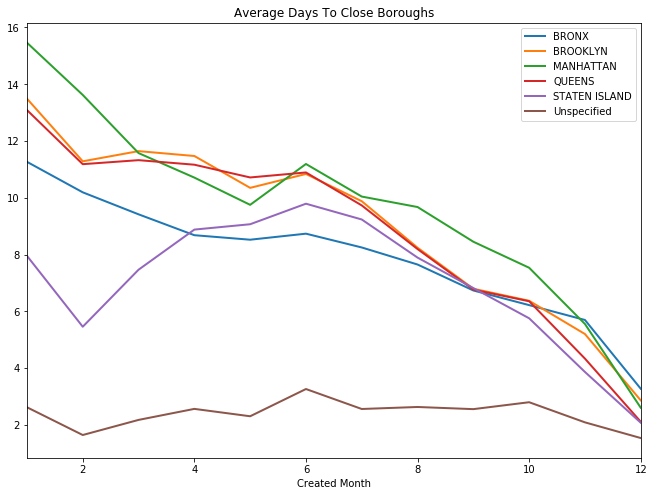

In [117]:
dayToClosePlot = pd.crosstab(columns=data['Borough'], index=data['Created Month'], values=data['DaysToClose'][data['DaysToClose'] >=0], aggfunc=np.mean, margins=False)
dayToClosePlot.plot(title = 'Average Days To Close Boroughs', lw=2, figsize=(11,8))
plt.legend(loc=1)

In [121]:
dayToClose

Borough
BRONX            8.093654
BROOKLYN         9.236238
MANHATTAN        9.785186
QUEENS           9.041730
STATEN ISLAND    7.268765
Unspecified      2.416830
Name: DaysToClose, dtype: float64

In [1]:
newDaysToClose = data.DaysToClose[data.DaysToClose >=0].groupby(data['Borough']).mean()

NameError: name 'data' is not defined